In [2]:
import pandas as pd
from sklearn import tree, ensemble
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('StudentsPerformance.csv')

#tambahkan label untuk math score
df['tinggi'] = df.apply(lambda x: 1 if x['math score'] > 50 else 0, axis=1) 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,tinggi
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,1


In [19]:
#membuat decisiotn tree dan random forest
x = df.drop(['tinggi', 'math score'], axis=1)
x = pd.get_dummies(x)
y = df['tinggi']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=10)
print(x_test)

     reading score  writing score  gender_female  gender_male  \
841             58             51          False         True   
956             87             81          False         True   
544             63             66           True        False   
173             67             70           True        False   
759             77             77          False         True   
..             ...            ...            ...          ...   
961             54             53           True        False   
213             51             56          False         True   
465             87             91           True        False   
206             62             62          False         True   
665             60             60           True        False   

     race/ethnicity_group A  race/ethnicity_group B  race/ethnicity_group C  \
841                   False                   False                    True   
956                   False                   False          

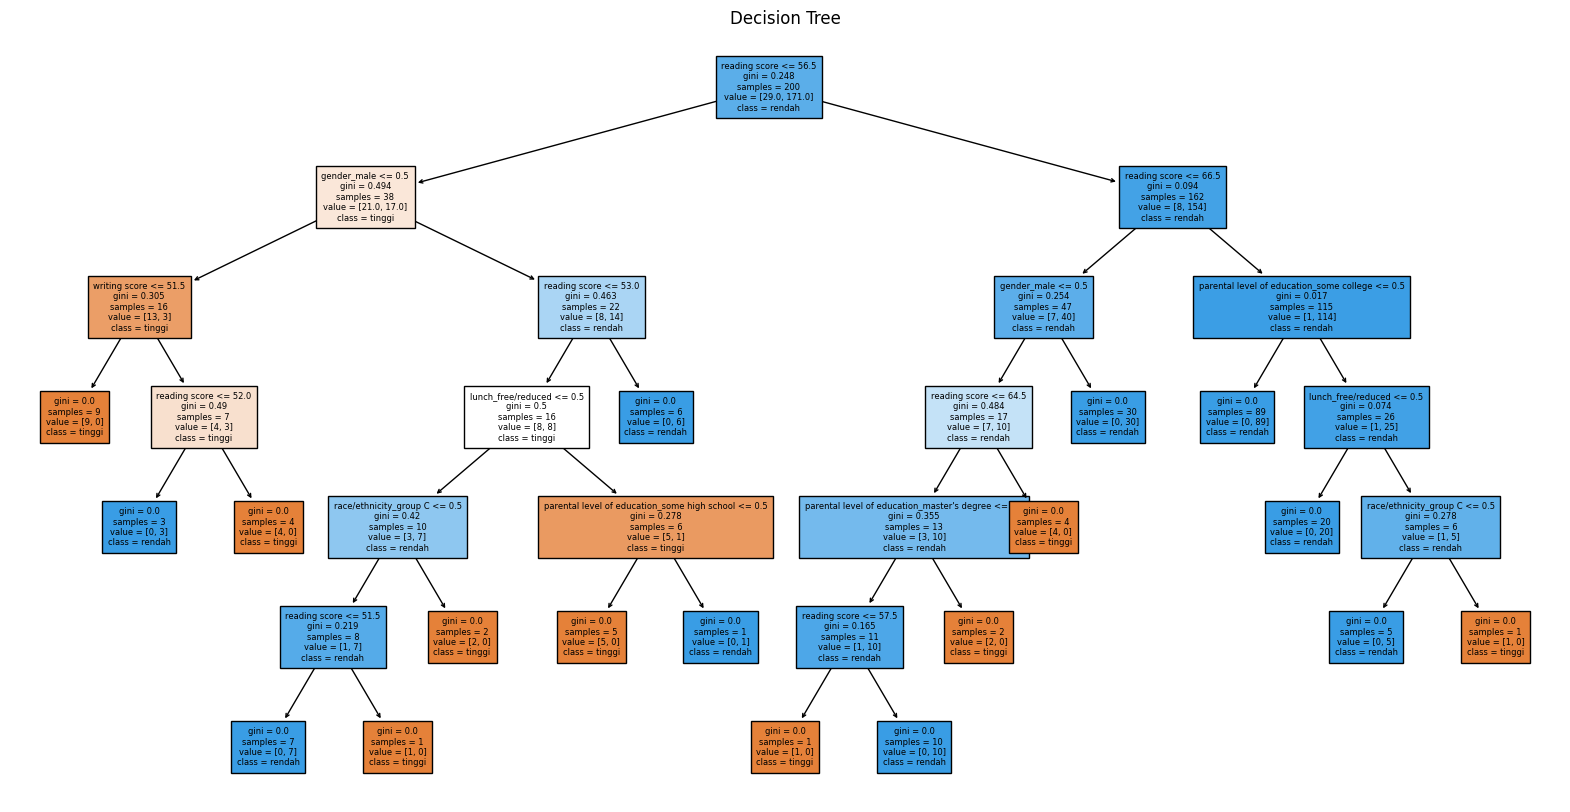

In [20]:
dcsn = tree.DecisionTreeClassifier(random_state=10).fit(x_train,y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(dcsn, feature_names=x.columns, class_names=['tinggi', 'rendah'], filled=True, fontsize=6)
plt.title('Decision Tree')
plt.show()

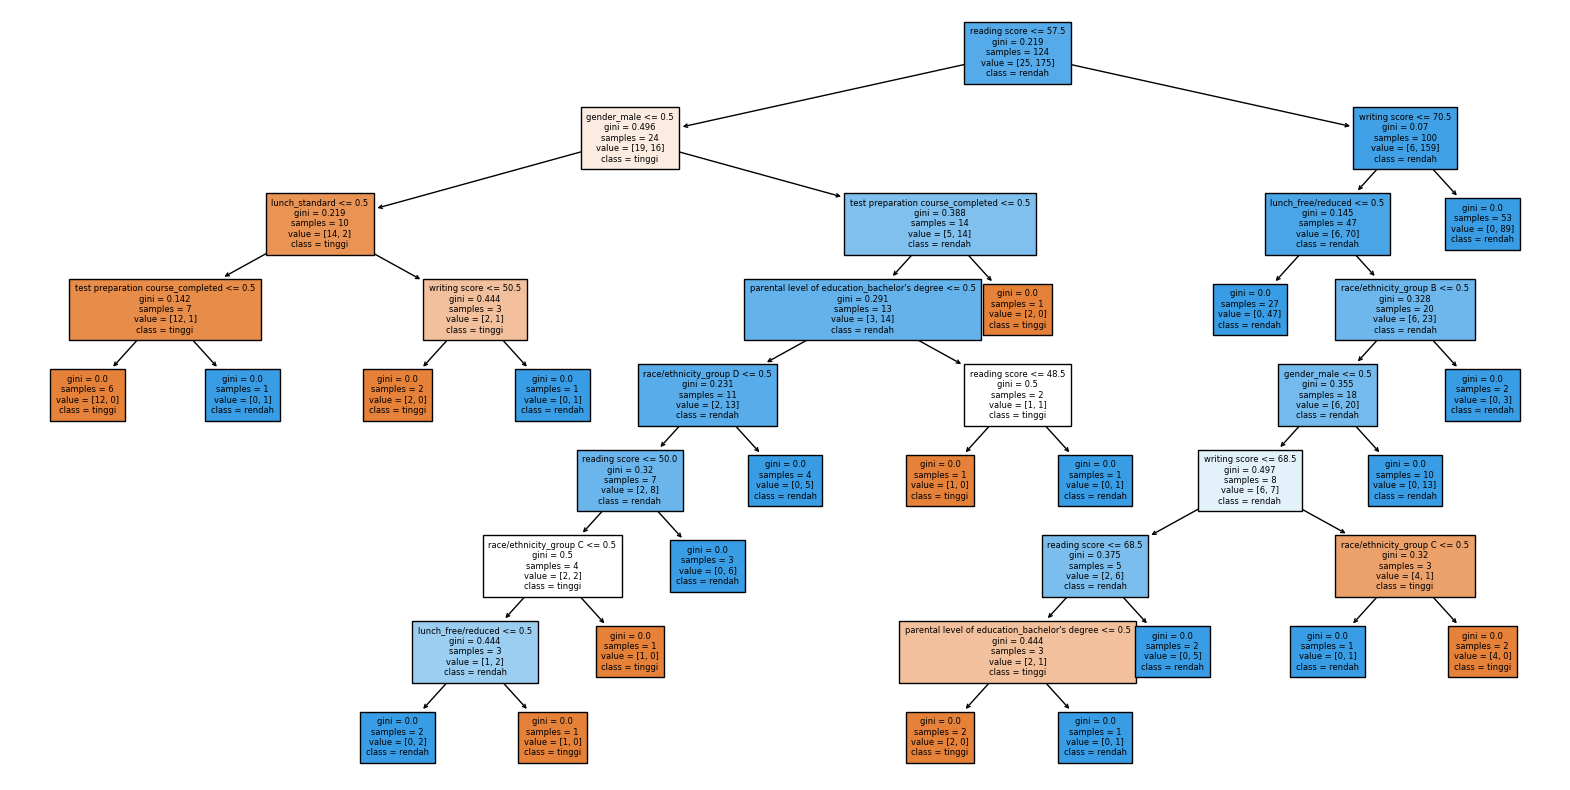

In [21]:
forest = ensemble.RandomForestClassifier(n_estimators=100, random_state=10) 
rt = forest.fit(x_train,y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(forest.estimators_[0], feature_names=x.columns, class_names=['tinggi', 'rendah'], filled=True, fontsize=6)
plt.show()